In [14]:
import tensorflow as tf

2025-09-13 19:02:16.689095: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Building an Image Classifier Using the Sequential API

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()


/home/hc/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1757757741.184421   40134 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2552 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-09-13 19:02:23.820823: I external/local_xla/xla/service/service.cc:163] XLA service 0x78a4900047f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-13 19:02:23.820903: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-09-13 19:02:23.843427: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-13 19:02:23.944207: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300


  46/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2469 - loss: 2.1370

I0000 00:00:1757757745.162995   40679 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7615 - loss: 0.7188 - val_accuracy: 0.8290 - val_loss: 0.5106
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8304 - loss: 0.4887 - val_accuracy: 0.8398 - val_loss: 0.4543
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8454 - loss: 0.4418 - val_accuracy: 0.8494 - val_loss: 0.4286
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8543 - loss: 0.4142 - val_accuracy: 0.8528 - val_loss: 0.4130
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8611 - loss: 0.3938 - val_accuracy: 0.8568 - val_loss: 0.4009
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8662 - loss: 0.3777 - val_accuracy: 0.8592 - val_loss: 0.3912
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8711 - loss: 0.3644 - val_accuracy: 0.8624 - val_loss: 0.3839
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8747 - loss: 0.3529 - val_accura

<Axes: >

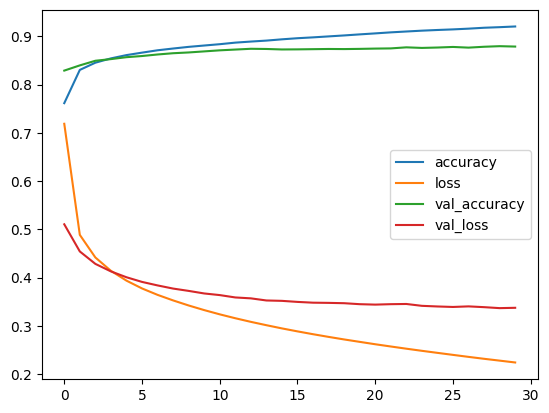

In [19]:
import pandas as pd
pd.DataFrame(history.history).plot()

### Regression MLPs

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50], random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)
rmse

0.5053326657968684

### Building a Regression MLP Using the Sequential API

In [23]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:]) #same as StandardScalar
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20


/home/hc/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - RootMeanSquaredError: 1.0072 - loss: 1.0145 - val_RootMeanSquaredError: 0.6588 - val_loss: 0.4340
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6169 - loss: 0.3805 - val_RootMeanSquaredError: 0.6574 - val_loss: 0.4322
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5920 - loss: 0.3505 - val_RootMeanSquaredError: 0.8319 - val_loss: 0.6920
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5849 - loss: 0.3422 - val_RootMeanSquaredError: 1.4397 - val_loss: 2.0726
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5700 - loss: 0.3249 - val_RootMeanSquaredError: 0.8118 - val_loss: 0.6591
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.5613 - loss: 0.3151 - val_RootMeanSquaredError: 1.0701 - val_loss: 1.1450
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.5522 - loss: 0.3049 

### Building Complex Models Using the Functional API

In [26]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
out_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized,hidden2])
output = out_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 8)         │         17 │ input_layer_3[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        270 │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 30)        │        930 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 38)        │          0 │ normalization_4[… │
│ (Concatenate)       │                   │            │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │         39 │ concatenate_1[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - RootMeanSquaredError: 1.1350 - loss: 1.2883 - val_RootMeanSquaredError: 0.9413 - val_loss: 0.8860
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6561 - loss: 0.4304 - val_RootMeanSquaredError: 0.6089 - val_loss: 0.3708
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6225 - loss: 0.3874 - val_RootMeanSquaredError: 0.6325 - val_loss: 0.4000
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6094 - loss: 0.3714 - val_RootMeanSquaredError: 0.5879 - val_loss: 0.3456
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5987 - loss: 0.3585 - val_RootMeanSquaredError: 0.6290 - val_loss: 0.3957
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5913 - loss: 0.3496 - val_RootMeanSquaredError: 0.6141 - val_loss: 0.3771
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5825 - lo

#### Multiple inputs

In [37]:
input_wide = tf.keras.layers.Input(shape=[5], name="input_wide") #feature 0 to 4
input_deep = tf.keras.layers.Input(shape=[6], name="input_deep") # feature 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30,activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30,activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_deep          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_18    │ (None, 6)         │         13 │ input_deep[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_wide          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 30)        │        210 │ normalization_18… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_17    │ (None, 5)         │         11 │ input_wide[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 30)        │        930 │ dense_34[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 35)        │          0 │ normalization_17… │
│ (Concatenate)       │                   │            │ dense_35[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 1)         │         36 │ concatenate_8[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit({"input_wide": X_train_wide, "input_deep": X_train_deep}, y_train, epochs=20,
validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - RootMeanSquaredError: 1.1672 - loss: 1.3624 - val_RootMeanSquaredError: 1.0982 - val_loss: 1.2059
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.7073 - loss: 0.5002 - val_RootMeanSquaredError: 1.0879 - val_loss: 1.1836
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6671 - loss: 0.4451 - val_RootMeanSquaredError: 0.9042 - val_loss: 0.8176
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6375 - loss: 0.4064 - val_RootMeanSquaredError: 0.7637 - val_loss: 0.5833
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - RootMeanSquaredError: 0.6181 - loss: 0.3821 - val_RootMeanSquaredError: 0.6520 - val_loss: 0.4251
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - RootMeanSquaredError: 0.6091 - loss: 0.3710 - val_RootMeanSquaredError: 0.9588 - val_loss: 0.9193
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - RootMeanSquaredError: 0.6022 - lo

: 

### Using the Subclassing API to Build Dynamic Models

In [ ]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

